In [184]:
import pandas as pd
import numpy as np
import os

In [185]:
sales = pd.read_csv('sales_data.csv')
customer = pd.read_csv('customer_data.csv')

In [186]:
sales.head()

,Customer_ID,Transaction_Date,Product_ID,Product_Category,Quantity,Price,Total_Sales
0,103,2023-01-01,49,Clothing,4,114.93,459.72
1,436,2023-01-02,11,Books,1,164.23,164.23
2,349,2023-01-03,85,Groceries,9,424.78,3823.02
3,271,2023-01-04,26,Books,6,365.79,2194.74
4,107,2023-01-05,63,Furniture,1,52.22,52.22


In [187]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       1010 non-null   int64  
 1   Transaction_Date  1010 non-null   object 
 2   Product_ID        1010 non-null   int64  
 3   Product_Category  1010 non-null   object 
 4   Quantity          1010 non-null   int64  
 5   Price             990 non-null    float64
 6   Total_Sales       1010 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 55.4+ KB


In [188]:
sales.shape

(1010, 7)

In [189]:
customer.head()

,Customer_ID,Age,Gender,Location
0,1,34,Male,East
1,2,43,Male,North
2,3,30,Female,East
3,4,34,Male,North
4,5,55,Male,West


In [190]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  500 non-null    int64 
 1   Age          500 non-null    int64 
 2   Gender       500 non-null    object
 3   Location     500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


### Filling missing price

In [191]:
sales.isna().any()

Customer_ID         False
Transaction_Date    False
Product_ID          False
Product_Category    False
Quantity            False
Price                True
Total_Sales         False
dtype: bool

In [192]:
missing_price = sales[sales['Price'].isna()]

In [193]:
calculate_price = missing_price['Total_Sales']/ missing_price['Quantity']

In [194]:
sales.loc[sales['Price'].isna(), 'Price'] = calculate_price

In [195]:
sales.isna().any()

Customer_ID         False
Transaction_Date    False
Product_ID          False
Product_Category    False
Quantity            False
Price               False
Total_Sales         False
dtype: bool

### Dealing with duplicates

In [196]:
sales[sales.duplicated()]

,Customer_ID,Transaction_Date,Product_ID,Product_Category,Quantity,Price,Total_Sales
1000,58,2024-08-30,33,Books,5,292.57,1462.85
1001,191,2025-06-15,4,Books,7,134.22,939.54
1002,29,2023-07-24,67,Books,6,322.66,1935.96
1003,217,2023-05-01,96,Books,2,358.64,717.28
1004,201,2025-08-25,28,Clothing,9,111.27,1001.43
1005,460,2025-08-03,42,Books,2,86.38,172.76
1006,304,2024-02-17,45,Groceries,9,120.93,1088.37
1007,369,2025-02-02,95,Furniture,8,229.73,1837.84
1008,330,2024-12-07,11,Groceries,8,222.67,1781.36
1009,372,2024-07-30,67,Books,7,290.47,2033.29


In [197]:
sales.drop_duplicates(inplace = True)

In [198]:
sales[sales.duplicated()].any()

Customer_ID         False
Transaction_Date    False
Product_ID          False
Product_Category    False
Quantity            False
Price               False
Total_Sales         False
dtype: bool

In [199]:
customer.isna().sum()

Customer_ID    0
Age            0
Gender         0
Location       0
dtype: int64

In [200]:
customer.duplicated().any()

False

### Merging the cleaned data for further analysis

In [201]:
all_data = pd.merge(sales,customer, on='Customer_ID', how='inner')

In [202]:
all_data.head()

,Customer_ID,Transaction_Date,Product_ID,Product_Category,Quantity,Price,Total_Sales,Age,Gender,Location
0,103,2023-01-01,49,Clothing,4,114.93,459.72,68,Female,South
1,103,2023-01-09,27,Electronics,4,332.90,1331.60,68,Female,South
2,103,2024-07-25,7,Groceries,2,450.98,901.96,68,Female,South
3,436,2023-01-02,11,Books,1,164.23,164.23,51,Female,East
4,436,2025-03-14,18,Books,5,5.32,26.60,51,Female,East


In [203]:
all_data.shape

(1000, 10)

In [204]:
all_data.describe()

,Customer_ID,Product_ID,Quantity,Price,Total_Sales,Age
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,251.68300,50.115000,5.017000,250.957780,1256.171040,42.449000
std,141.79995,29.196853,2.591414,141.940459,1035.207237,15.139306
min,1.00000,1.000000,1.000000,5.010000,5.990000,18.000000
25%,134.75000,25.000000,3.000000,128.182500,410.115000,29.750000
50%,247.00000,50.500000,5.000000,251.920000,932.130000,42.000000
75%,374.00000,75.000000,7.000000,373.385000,1891.215000,56.000000
max,500.00000,100.000000,9.000000,499.780000,4487.490000,69.000000


### Creating a month column

In [205]:
all_data['Transaction_Date']= pd.to_datetime(all_data['Transaction_Date'])

In [206]:
all_data['Month'] = all_data['Transaction_Date'].dt.month

In [207]:
all_data.head()

,Customer_ID,Transaction_Date,Product_ID,Product_Category,Quantity,Price,Total_Sales,Age,Gender,Location,Month
0,103,2023-01-01,49,Clothing,4,114.93,459.72,68,Female,South,1
1,103,2023-01-09,27,Electronics,4,332.90,1331.60,68,Female,South,1
2,103,2024-07-25,7,Groceries,2,450.98,901.96,68,Female,South,7
3,436,2023-01-02,11,Books,1,164.23,164.23,51,Female,East,1
4,436,2025-03-14,18,Books,5,5.32,26.60,51,Female,East,3


In [214]:
## reconverting transaction date to obj
all_data['Transaction_Date'] = all_data['Transaction_Date'].astype(str)

In [215]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       1000 non-null   int64  
 1   Transaction_Date  1000 non-null   object 
 2   Product_ID        1000 non-null   int64  
 3   Product_Category  1000 non-null   object 
 4   Quantity          1000 non-null   int64  
 5   Price             1000 non-null   float64
 6   Total_Sales       1000 non-null   float64
 7   Age               1000 non-null   int64  
 8   Gender            1000 non-null   object 
 9   Location          1000 non-null   object 
 10  Month             1000 non-null   int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 82.2+ KB


##  DATA INSIGHTS

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Distribution of age

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


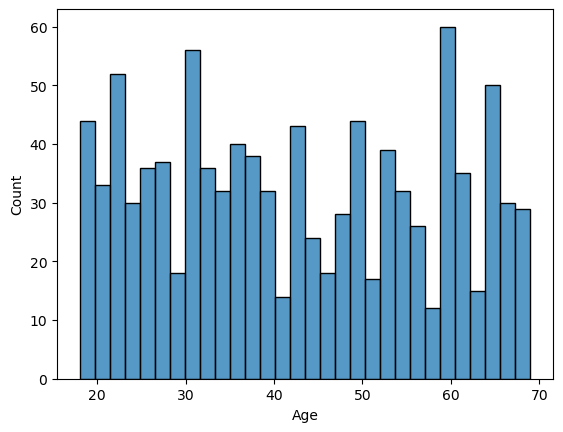

In [310]:
sns.histplot(all_data['Age'], bins=30)
plt.show()

In [311]:
# Age that is most common
most_common_age = all_data['Age'].mode()[0]
print("The most common age is:", most_common_age)

The most common age is: 59


### 2. Which is the most sold product category

In [233]:
counts = sales['Product_Category'].value_counts()

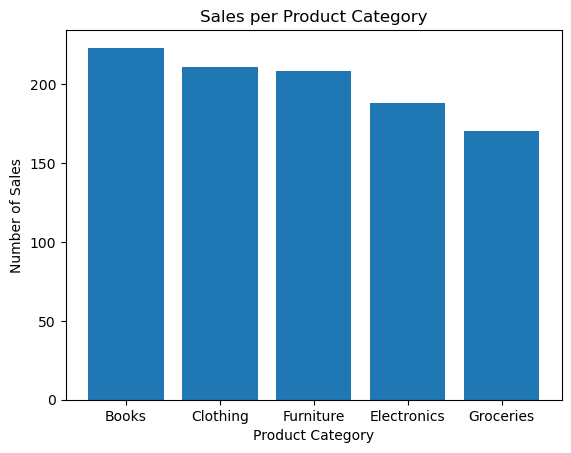

In [236]:
plt.bar(counts.index, counts.values)
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.title('Sales per Product Category')
plt.show()

### 3. What was the best month for sales? How much was earned that month?

In [274]:
sales_byMonth = all_data.groupby('Month').sum()

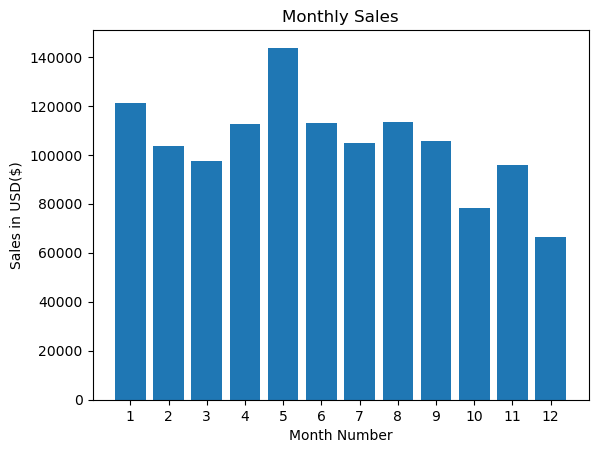

In [275]:
months = range(1,13)
plt.bar(months, sales_byMonth['Total_Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.title('Monthly Sales')
plt.show()

In [309]:
## highest sale amount
all_data.groupby('Month')['Total_Sales'].sum().max()

143715.41

### 4.Distribution of Gender in our dataset

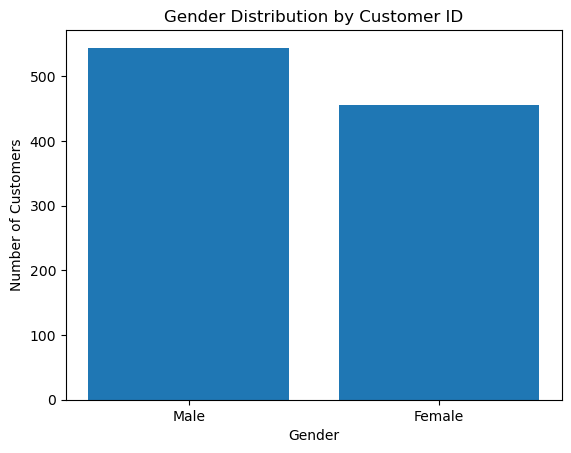

In [288]:
gender_counts = all_data['Gender'].value_counts()


plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution by Customer ID')
plt.show()

In [351]:
File_path = r'C:\Users\admin\Desktop\Sales\Cleaned_data.csv'

In [352]:
all_data.to_csv(File_path, index=False)

print(f"Data saved successfully to '{File_path}'.")

Data saved successfully to 'C:\Users\admin\Desktop\Sales\Cleaned_data.csv'.
